In [25]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [26]:
params = {
    "k_E": 0.4,
    "k_M": 1.0,
    "k_CD": 0.03,
    "k_CDS": 0.45,
    "k_R": 0.18,
    "k_RE": 180,
    "k_b": 0.003,
    "K_S": 0.5,
    "k_CE": 0.35,
    "d_M": 0.7,
    "d_E": 0.25,
    "d_CD": 1.5,
    "d_CE": 1.5,
    "d_R": 0.06,
    "d_RP": 0.06,
    "d_RE": 0.03,
    "k_P1": 18,
    "k_P2": 18,
    "k_DP": 3.6,
    "K_M": 0.15,
    "K_E": 0.15,
    "K_CD": 0.92,
    "K_CE": 0.92,
    "K_RP": 0.01
}

In [27]:
def serum(time):
    R = 7
    hi = 20
    low = .3
    if time < R:
        return hi
    else: return low

In [28]:
def systems(X, t):
    S = serum(t)
    globals().update(params)
    
    # ODEs as vector elements
    M = X[0]
    CD = X[1]
    CE = X[2]
    E = X[3]
    R = X[4]
    RP = X[5]
    RE = X[6]
    
    dMdt = (k_M * S)/(K_S + S) - d_M * M
    dCDdt = -(d_CD * CD) + (k_CD * M)/(K_M + M) + (k_CDS * S)/(K_S + S)
    dCEdt = (k_CE * E)/(K_E + E) - d_CE * CE
    dEdt = -(k_RE * E * R) + (((k_P1 * CD * RE)/(K_CD + RE)) + ((k_P2 * CE * RE)/(K_CE + RE))) + ((k_E * M)/(K_M + M)) * ((E)/(K_E + E)) + k_b * (M / (K_M + M)) - (d_E * E)
    dRdt = -(d_R * R) - (k_RE * E * R) + ((k_DP * RP)/(K_RP + RP)) - (((k_P1 * CD * R)/(K_CD + R)) + ((k_P2 * CE * R)/(K_CE + R))) + k_R
    dRPdt = -(d_RP * RP) + (((k_P1 * CD * RE)/(K_CD + RE)) + ((k_P2 * CE * RE)/(K_CE + RE))) - (k_DP * RP)/(K_RP + RP) + (((k_P1 * CD * R)/(K_CD + R)) + ((k_P2 * CE * R)/(K_CE + R)))
    dREdt = -(d_RE * RE) + (k_RE * E * R) - (((k_P1 * CD * RE)/(K_CD + RE)) + ((k_P2 * CE * RE)/(K_CE + RE)))
    
    return [dMdt, dCDdt, dCEdt, dEdt, dRdt, dRPdt, dREdt]

In [41]:
def s_fun(S, k_M):
    return (k_M * S)/(K_S + S)

def systems(X, t, S):
    globals().update(params)
    
    # ODEs as vector elements
    M = X[0]
    CD = X[1]
    CE = X[2]
    E = X[3]
    R = X[4]
    RP = X[5]
    RE = X[6]
    
    dMdt = (k_M * S)/(K_S + S) - d_M * M
    dCDdt = -(d_CD * CD) + (k_CD * M)/(K_M + M) + (k_CDS * S)/(K_S + S)
    dCEdt = (k_CE * E)/(K_E + E) - d_CE * CE
    dEdt = -(k_RE * E * R) + (((k_P1 * CD * RE)/(K_CD + RE)) + ((k_P2 * CE * RE)/(K_CE + RE))) + ((k_E * M)/(K_M + M)) * ((E)/(K_E + E)) + k_b * (M / (K_M + M)) - (d_E * E)
    dRdt = -(d_R * R) - (k_RE * E * R) + ((k_DP * RP)/(K_RP + RP)) - (((k_P1 * CD * R)/(K_CD + R)) + ((k_P2 * CE * R)/(K_CE + R))) + k_R
    dRPdt = -(d_RP * RP) + (((k_P1 * CD * RE)/(K_CD + RE)) + ((k_P2 * CE * RE)/(K_CE + RE))) - (k_DP * RP)/(K_RP + RP) + (((k_P1 * CD * R)/(K_CD + R)) + ((k_P2 * CE * R)/(K_CE + R)))
    dREdt = -(d_RE * RE) + (k_RE * E * R) - (((k_P1 * CD * RE)/(K_CD + RE)) + ((k_P2 * CE * RE)/(K_CE + RE)))
    
    return [dMdt, dCDdt, dCEdt, dEdt, dRdt, dRPdt, dREdt]

In [46]:
# initial conditions
X0 = [0, 0, 0, 0, 0, 0, .55]
serum_con = np.linspace(0.02, 20, 25)

# Time steps
hours = 100
t = np.linspace(0, hours)

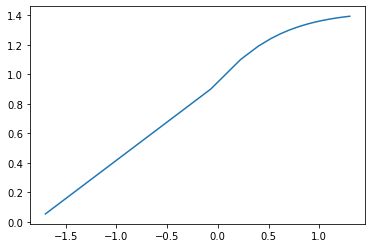

In [47]:
EE_SS = []
for S in serum_con:
    sol = odeint(systems, X0, t, args=(S,))
    EE_SS.append(sol[-1, 0])
    
plt.plot(np.log10(serum_con), EE_SS)

In [44]:
M = sol[:, 0]
CD = sol[:, 1]
CE = sol[:, 2]
E = sol[:, 3]
R = sol[:, 4]
RP = sol[:, 5]
RE = sol[:, 6]

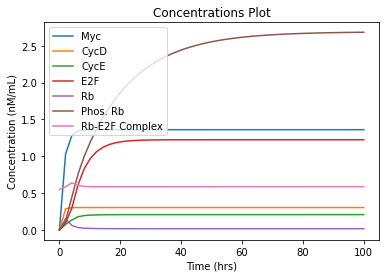

In [45]:
plt.plot()
plt.title('Concentrations Plot')
plt.xlabel('Time (hrs)')
plt.ylabel('Concentration (nM/mL)')
plt.plot(t, M, label="Myc")
plt.plot(t, CD, label="CycD")
plt.plot(t, CE, label="CycE")
plt.plot(t, E, label="E2F")
plt.plot(t, R, label="Rb")
plt.plot(t, RP, label="Phos. Rb")
plt.plot(t, RE, label="Rb-E2F Complex")
plt.legend()
plt.show()

_____________________________________________________________________________________________________________________________________________

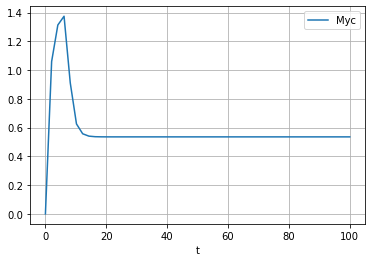

In [13]:
plt.plot(t, sol[:, 0], label='Myc')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()